In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, linear_model, model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact


## Basic social demographic plots


In [3]:
# Read the CSV file
url = 'https://raw.githubusercontent.com/iatecookies/BachelorThesis/main/survey.csv'
df = pd.read_csv(filepath_or_buffer=url, header=0, index_col=0)

# PREPROCESSING

# Remove the first two rows
df = df.iloc[3:]

# index of dataframe represents a start date. Replaced with sequantial numeric index
df.reset_index(drop=True, inplace=True)

df.head()



,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2023-06-27 05:43:53,IP Address,94.63.88.205,100,162,True,2023-06-27 05:43:53,R_2qqiiUIZB7C86i1,NaN,NaN,...,Scenario 1,Male,35-44 years old,Portugal,City,Bachelor's degree,Working full-time,Walking,NaN,5de78fbbd7b2a0000bc2df59
1,2023-06-27 05:44:10,IP Address,146.198.45.107,100,189,True,2023-06-27 05:44:11,R_3FUTMLBYBJ8JME3,NaN,NaN,...,Scenario 1,Male,35-44 years old,United Kingdom of Great Britain and Northern I...,Rural,Bachelor's degree,Working full-time,Car,NaN,5c6ddaefdf677d00013fa313
2,2023-06-27 05:44:37,IP Address,163.158.111.63,100,125,True,2023-06-27 05:44:38,R_1pF4y9jkmvjeoBP,NaN,NaN,...,Scenario 1,Female,25-34 years old,Netherlands,City,Bachelor's degree,Working full-time,Car,NaN,60216ae272e775127f1ecd1f
3,2023-06-27 05:45:19,IP Address,82.26.181.154,100,213,True,2023-06-27 05:45:20,R_32VElPHHT1qpL7w,NaN,NaN,...,Scenario 1,Female,18-24 years old,United Kingdom of Great Britain and Northern I...,City,High school diploma or equivalent,Student,"Public transportation (bus, train, subway, etc)",I picked what was most pleasant for me,5df119cae3cc5b012d81f64b
4,2023-06-27 05:46:20,IP Address,95.108.58.252,100,166,True,2023-06-27 05:46:21,R_1gzkDAWpa1ZtqQ0,NaN,NaN,...,Scenario 1,Male,18-24 years old,Poland,City,Bachelor's degree,Working part-time,"Public transportation (bus, train, subway, etc)",NaN,5ea9c1f55ce96d106af147a7


Text(0.5, 1.0, 'Distribution of Ages')

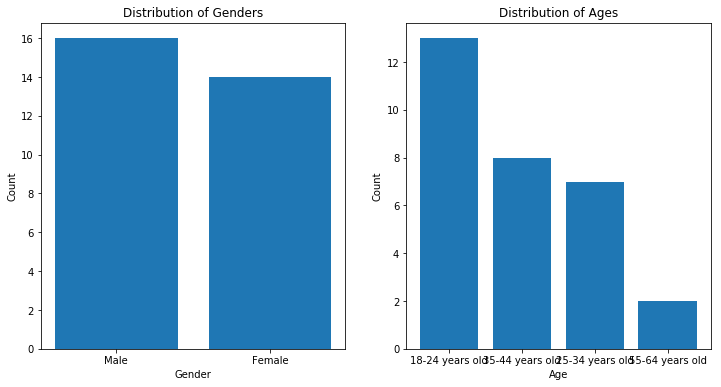

In [4]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figure size if needed


# Plot 1: Gender Distribution
gender_counts = df['Q15'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Genders')



# Plot 2: Age Distribution
age_counts = df['Q16'].value_counts()
axes[1].bar(age_counts.index, age_counts.values)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Ages')


# plt.tight_layout()
# plt.savefig("results.pdf")
# Show the plot
# plt.show()

Text(0.5, 1.0, 'Gender Distribution Table')

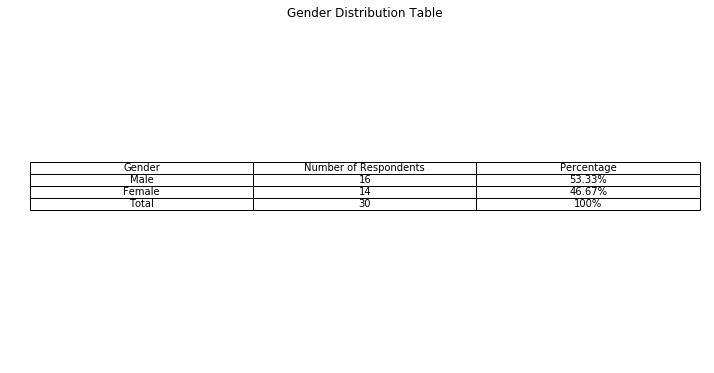

In [5]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed


# Create a DataFrame for the table
gender_table_data = {
    'Gender': ['Male', 'Female', 'Total'],
    'Number of Respondents': [gender_counts['Male'], gender_counts['Female'], len(df)],
    'Percentage': [f"{(gender_counts['Male'] / len(df) * 100):.2f}%", f"{(gender_counts['Female'] / len(df) * 100):.2f}%", '100%']
}
                   
gender_table = pd.DataFrame(gender_table_data)
                   
axes.axis('off')
axes.table(cellText=gender_table.values, colLabels=gender_table.columns, cellLoc='center', loc='center')
axes.set_title('Gender Distribution Table')
                        
# plt.tight_layout()
# Show the plot
#plt.show()

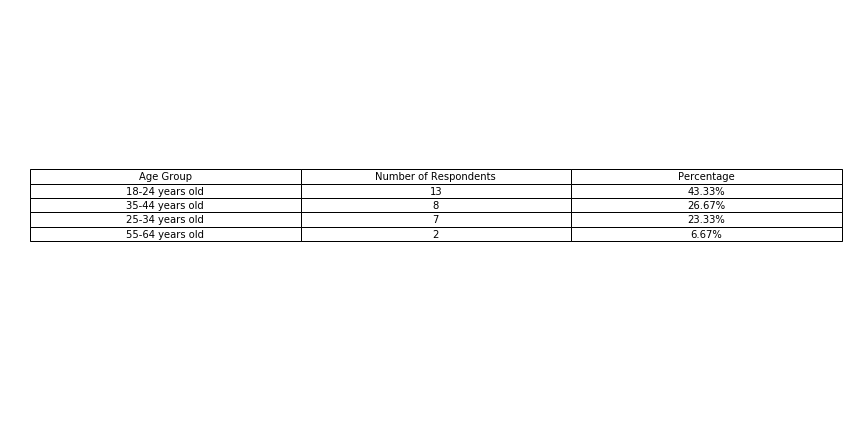

In [50]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed


# Create a DataFrame for the age distribution table
age_table_data = {
    'Age Group': age_counts.index,
    'Number of Respondents': age_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in age_counts.values]
}

age_table = pd.DataFrame(age_table_data)
                   
axes.axis('off')
axes.table(cellText=age_table.values, colLabels=age_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
plt.savefig("results.pdf")
# Show the plot
#plt.show()

Text(0.5, 1.0, 'Distribution of Living Area')

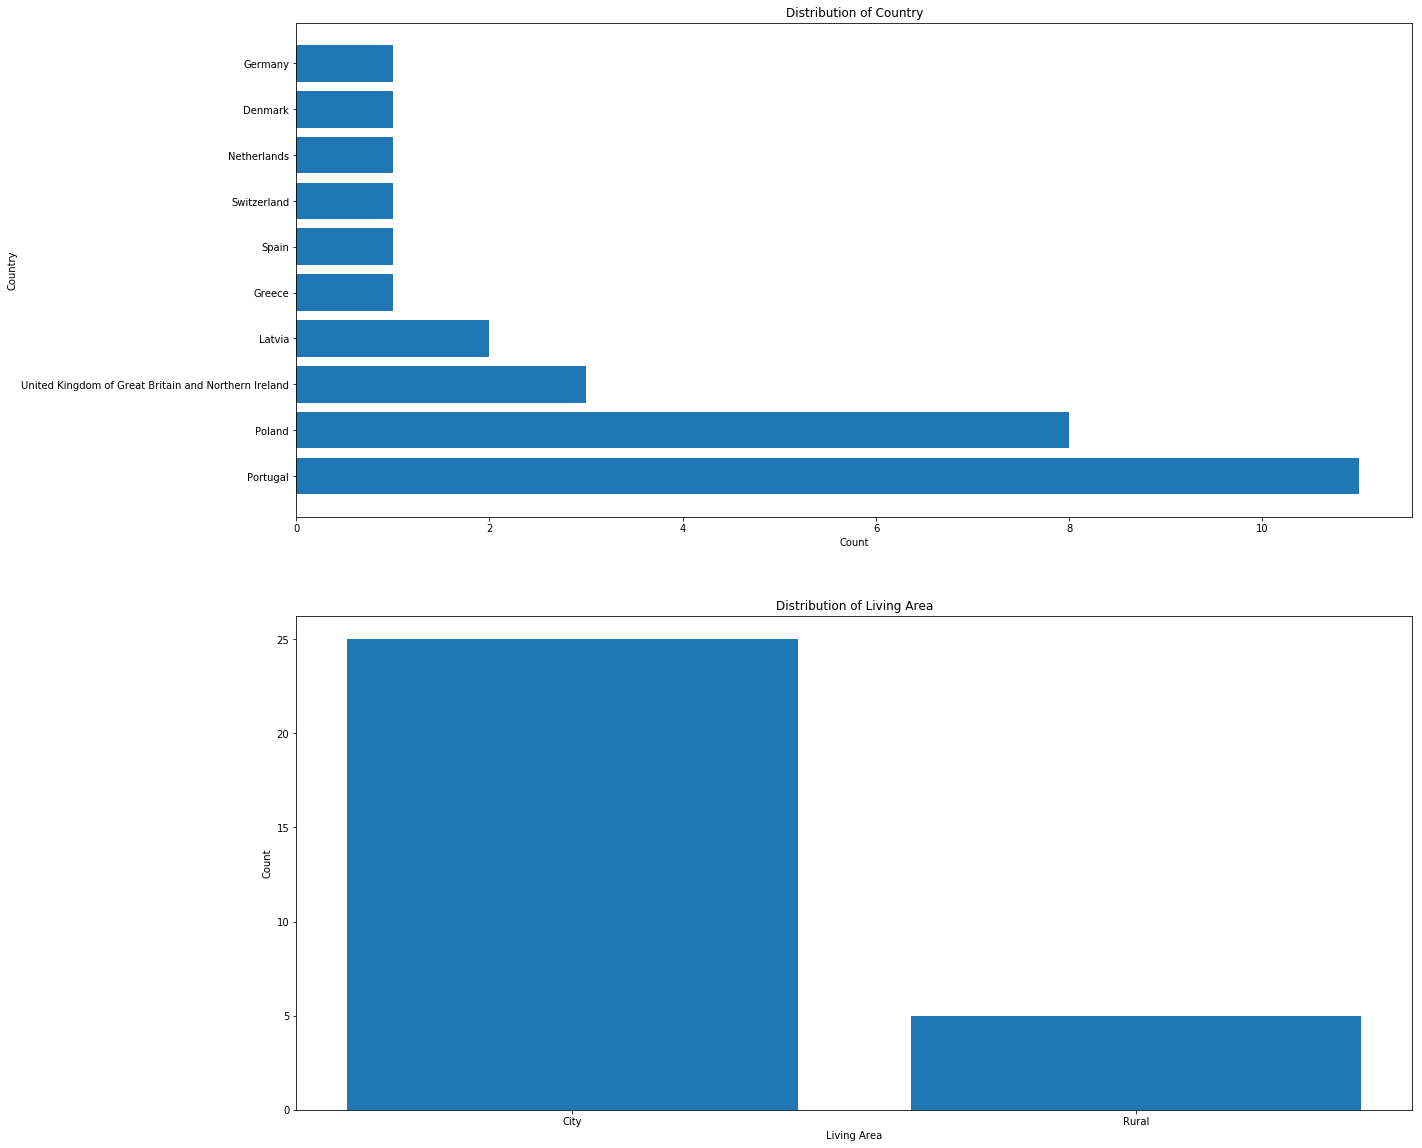

In [63]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 20))  # Adjust the figure size if needed


# Plot 1: Country Distribution
gender_counts = df['Q17'].value_counts()
axes[0].barh(gender_counts.index, gender_counts.values )
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Country')
axes[0].set_title('Distribution of Country')


# Plot 2: Living Area Distribution
age_counts = df['Q18'].value_counts()
axes[1].bar(age_counts.index, age_counts.values)
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Living Area')


# Show the plot
# plt.tight_layout()
# plt.savefig("results2.pdf")
# plt.show()

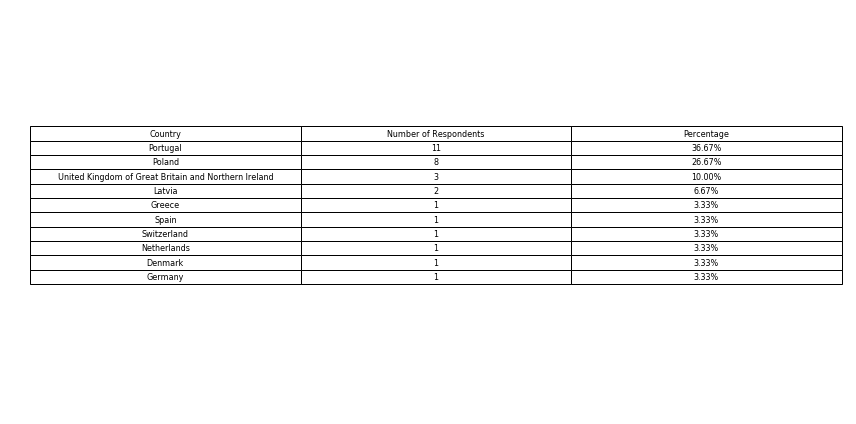

In [52]:

# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed

country_counts = df['Q17'].value_counts()
# Create a DataFrame for the country distribution table
country_table_data = {
    'Country': country_counts.index,
    'Number of Respondents': country_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in country_counts.values]
}

country_table = pd.DataFrame(country_table_data)
axes.axis('off')
axes.table(cellText=country_table.values, colLabels=country_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
#plt.show()

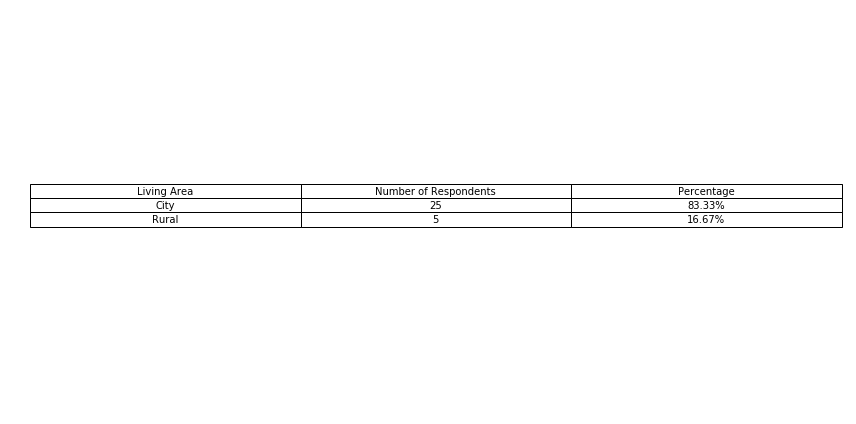

In [53]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed

living_area_counts = df['Q18'].value_counts()
# Create a DataFrame for the country distribution table
living_area_table_data = {
    'Living Area': living_area_counts.index,
    'Number of Respondents': living_area_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in living_area_counts.values]
}

living_area_table = pd.DataFrame(living_area_table_data)
axes.axis('off')
axes.table(cellText=living_area_table.values, colLabels=living_area_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
# Show the plot
#plt.show()

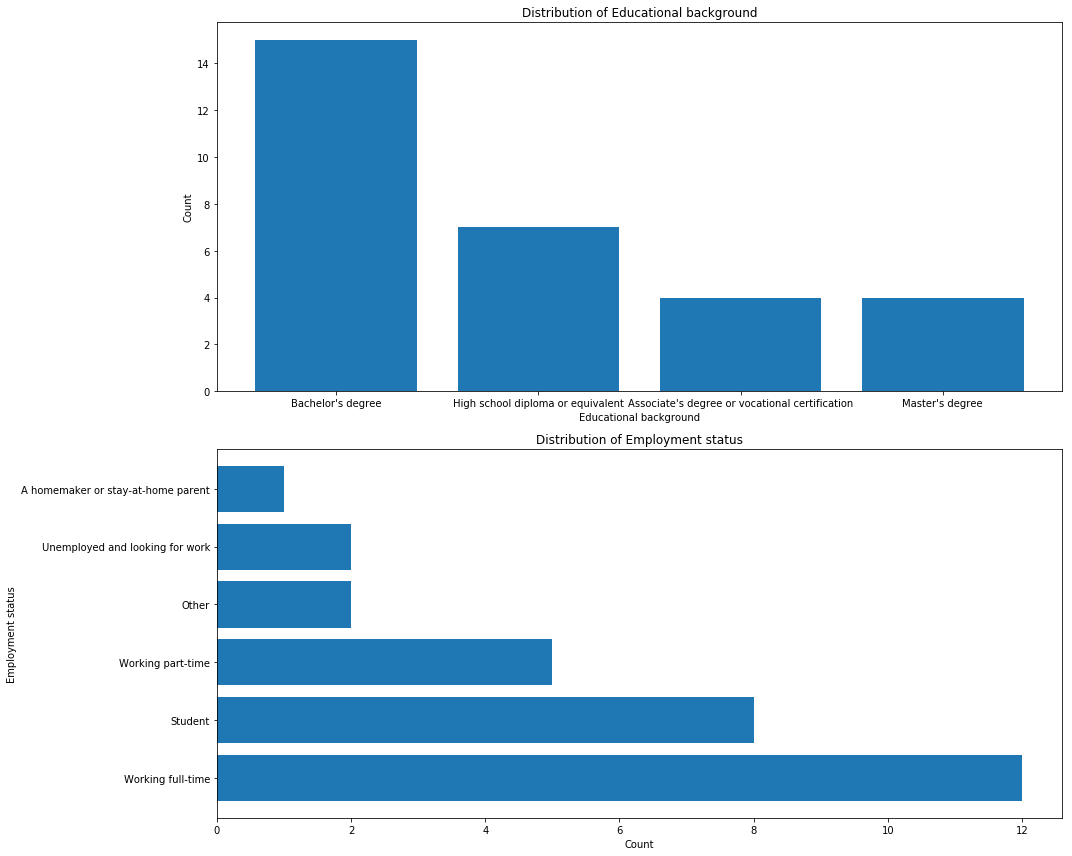

In [54]:
# Set up the figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))  # Adjust the figure size if needed


# Plot 1: Education Distribution
gender_counts = df['Q19'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values)
axes[0].set_xlabel('Educational background')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Educational background')



# Plot 2: Employment status distrubution
age_counts = df['Q20'].value_counts()
axes[1].barh(age_counts.index, age_counts.values)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Employment status')
axes[1].set_title('Distribution of Employment status')


plt.tight_layout()
plt.savefig("results3.pdf")
#plt.show()

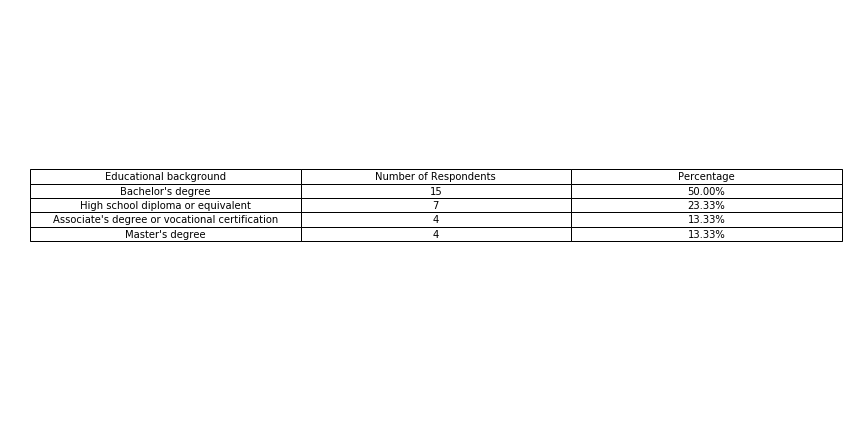

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed

education_counts = df['Q19'].value_counts()
# Create a DataFrame for the country distribution table
eductation_table_data = {
    'Educational background': education_counts.index,
    'Number of Respondents': education_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in education_counts.values]
}

education_table = pd.DataFrame(eductation_table_data)
axes.axis('off')
axes.table(cellText=education_table.values, colLabels=education_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
# Show the plot
#plt.show()

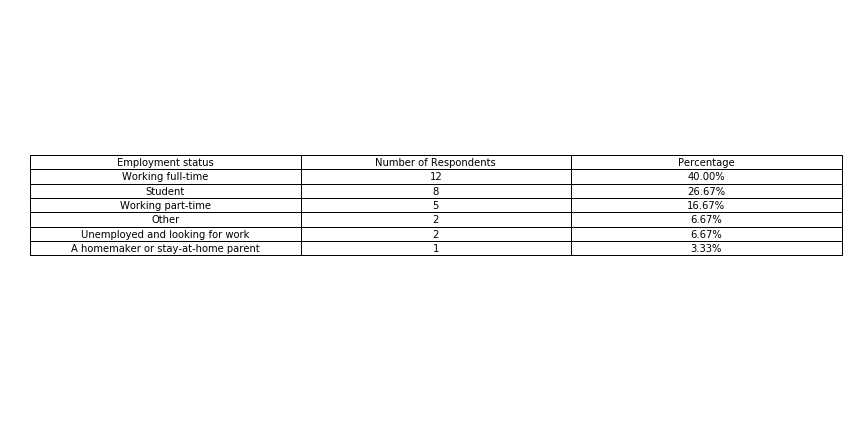

In [56]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed

employment_counts = df['Q20'].value_counts()
# Create a DataFrame for the country distribution table
employmen_table_data = {
    'Employment status': employment_counts.index,
    'Number of Respondents': employment_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in employment_counts.values]
}

employment_table = pd.DataFrame(employmen_table_data)
axes.axis('off')
axes.table(cellText=employment_table.values, colLabels=employment_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
# Show the plot
#plt.show()

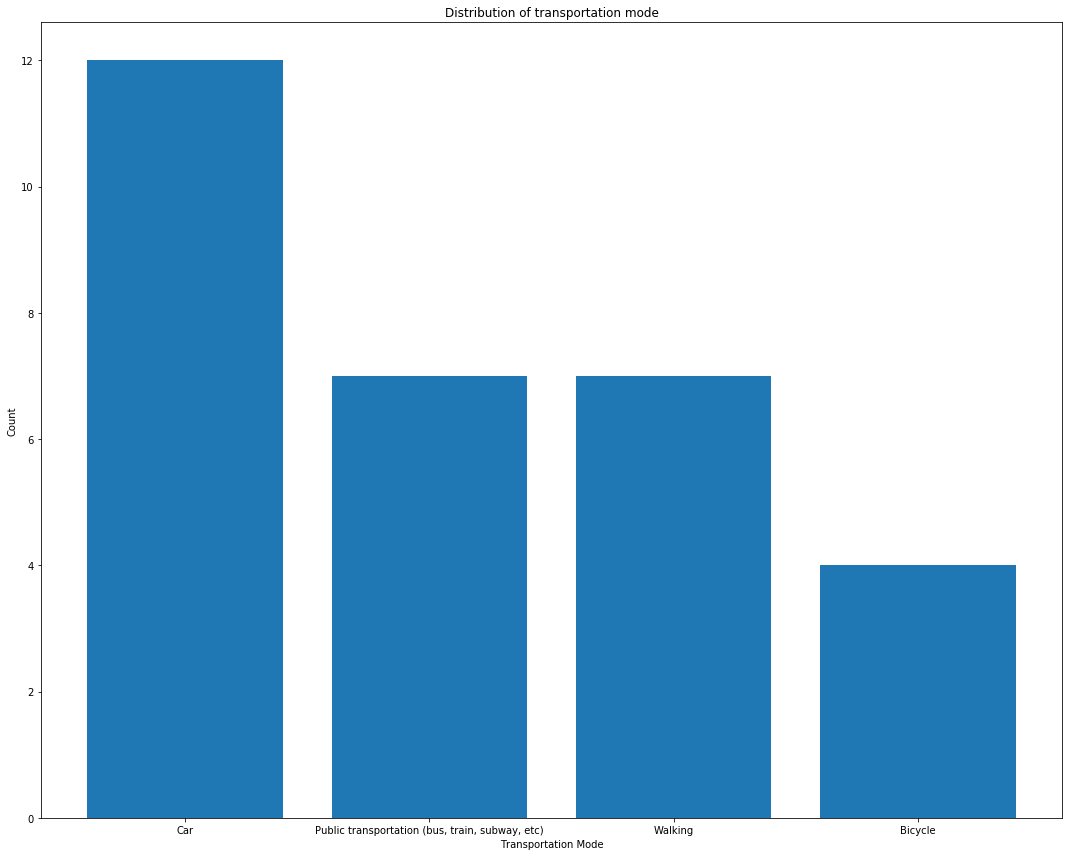

In [57]:
# Set up the figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(15, 12))  # Adjust the figure size if needed


# Plot 1: Education Distribution
gender_counts = df['Q21'].value_counts()
axes.bar(gender_counts.index, gender_counts.values)
axes.set_xlabel('Transportation Mode')
axes.set_ylabel('Count')
axes.set_title('Distribution of transportation mode')

plt.tight_layout()
plt.savefig("results4.pdf")
#plt.show()

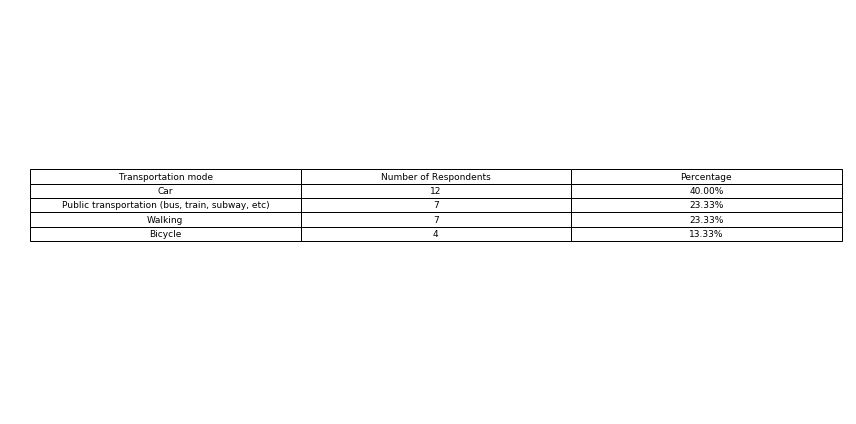

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))  # Adjust the figure size if needed

transportation_counts = df['Q21'].value_counts()
# Create a DataFrame for the country distribution table
transportation_table_data = {
    'Transportation mode': transportation_counts.index,
    'Number of Respondents': transportation_counts.values,
    'Percentage': [f"{(count / len(df) * 100):.2f}%" for count in transportation_counts.values]
}

transportation_table = pd.DataFrame(transportation_table_data)
axes.axis('off')
axes.table(cellText=transportation_table.values, colLabels=transportation_table.columns, cellLoc='center', loc='center')

plt.tight_layout()
# Show the plot
#plt.show()

## Descriptive statistics


In [11]:
# Select only columns Q1 to Q14
df_selected = df.loc[:, 'Q1':'Q14']

# Rename the columns to "Question1", "Question2", ..., "Question14"
df_selected.columns = [f"Question{i}" for i in range(1, 15)]

# Calculate frequencies for Q1 to Q14
freq_table = df_selected.apply(pd.Series.value_counts)

# Display the frequencies
print("Frequencies for Q1 to Q14:")
print(freq_table)

Frequencies for Q1 to Q14:
            Question1  Question2  Question3  Question4  Question5  Question6  \
Scenario 1         29          1         27       30.0         29       30.0   
Scenario 2          1         29          3        NaN          1        NaN   

            Question7  Question8  Question9  Question10  Question11  \
Scenario 1       30.0          8        NaN        30.0          21   
Scenario 2        NaN         22       30.0         NaN           9   

            Question12  Question13  Question14  
Scenario 1         NaN        30.0        30.0  
Scenario 2        30.0         NaN         NaN  


## Results. Q11 vs demographic


In [9]:
# Assuming your DataFrame is named 'df'
selected_columns = ['Q11', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21']
df_selected = df[selected_columns].copy()

print(df_selected)

           Q11     Q15              Q16  \
0   Scenario 1    Male  35-44 years old   
1   Scenario 1    Male  35-44 years old   
2   Scenario 1  Female  25-34 years old   
3   Scenario 1  Female  18-24 years old   
4   Scenario 2    Male  18-24 years old   
5   Scenario 1    Male  25-34 years old   
6   Scenario 1    Male  18-24 years old   
7   Scenario 1    Male  35-44 years old   
8   Scenario 2  Female  18-24 years old   
9   Scenario 1    Male  35-44 years old   
10  Scenario 1    Male  35-44 years old   
11  Scenario 2    Male  18-24 years old   
12  Scenario 2    Male  35-44 years old   
13  Scenario 2    Male  55-64 years old   
14  Scenario 1  Female  25-34 years old   
15  Scenario 1  Female  35-44 years old   
16  Scenario 1    Male  18-24 years old   
17  Scenario 2    Male  18-24 years old   
18  Scenario 2  Female  18-24 years old   
19  Scenario 1  Female  25-34 years old   
20  Scenario 1    Male  25-34 years old   
21  Scenario 1  Female  18-24 years old   
22  Scenari

In [10]:
contingency_table = pd.crosstab(df_selected['Q18'], df_selected['Q11'])


print(contingency_table)

Q11    Scenario 1  Scenario 2
Q18                          
City           17           8
Rural           4           1
